In [9]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
import matplotlib.pyplot as plt

In [10]:
# Step 1: Load Dataset and Model
data = pd.read_csv("/Users/sarabjotsingh/Downloads/Feature_engineering.csv")
rf_model = joblib.load('/Users/sarabjotsingh/Downloads/best_rf_model.pkl')

Portfolio Return: -104.42%


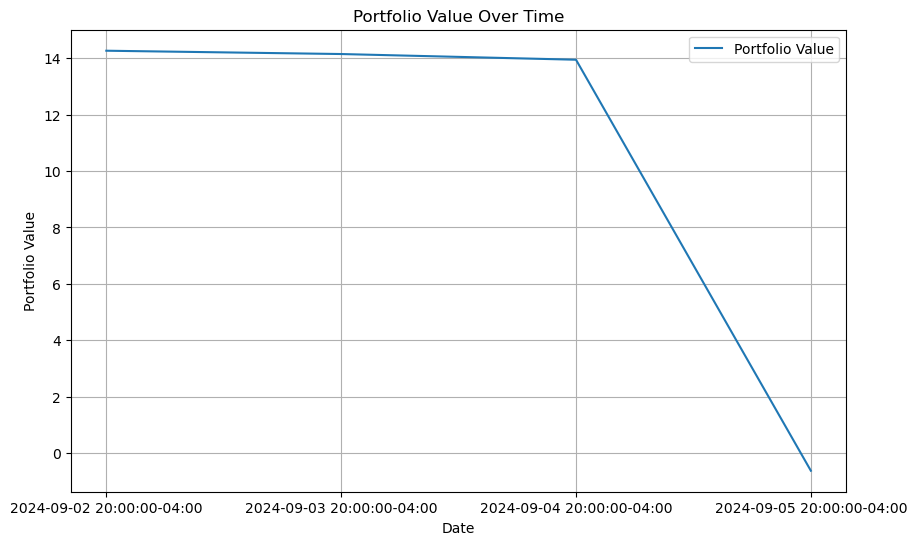

In [20]:
# Calculate daily portfolio returns
daily_portfolio_value = portfolio_data.groupby('date')['portfolio_value'].sum()
daily_returns = daily_portfolio_value.pct_change().dropna()  # Daily percentage change

# Overall portfolio return
initial_value = daily_portfolio_value.iloc[0]
final_value = daily_portfolio_value.iloc[-1]
portfolio_return = (final_value - initial_value) / initial_value * 100

print(f"Portfolio Return: {portfolio_return:.2f}%")

# Plot portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(daily_portfolio_value.index, daily_portfolio_value.values, label="Portfolio Value")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.title("Portfolio Value Over Time")
plt.legend()
plt.grid()
plt.show()

In [21]:
# Assume risk-free rate is 0.01 (1%)
risk_free_rate = 0.01
mean_daily_return = daily_returns.mean()
std_dev_daily_return = daily_returns.std()

# Calculate Sharpe Ratio
sharpe_ratio = (mean_daily_return - risk_free_rate) / std_dev_daily_return
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Sharpe Ratio: -0.61


In [22]:
# Calculate drawdown
cumulative_max = daily_portfolio_value.cummax()
drawdown = (daily_portfolio_value - cumulative_max) / cumulative_max
max_drawdown = drawdown.min()  # Most negative drawdown

print(f"Maximum Drawdown: {max_drawdown * 100:.2f}%")

Maximum Drawdown: -104.42%


In [23]:
# Volatility (standard deviation of daily returns)
volatility = daily_returns.std()
print(f"Portfolio Volatility: {volatility:.4f}")

Portfolio Volatility: 0.5970


In [24]:
# Calculate win rate
win_rate = (daily_returns > 0).mean() * 100
print(f"Win Rate: {win_rate:.2f}%")

Win Rate: 0.00%


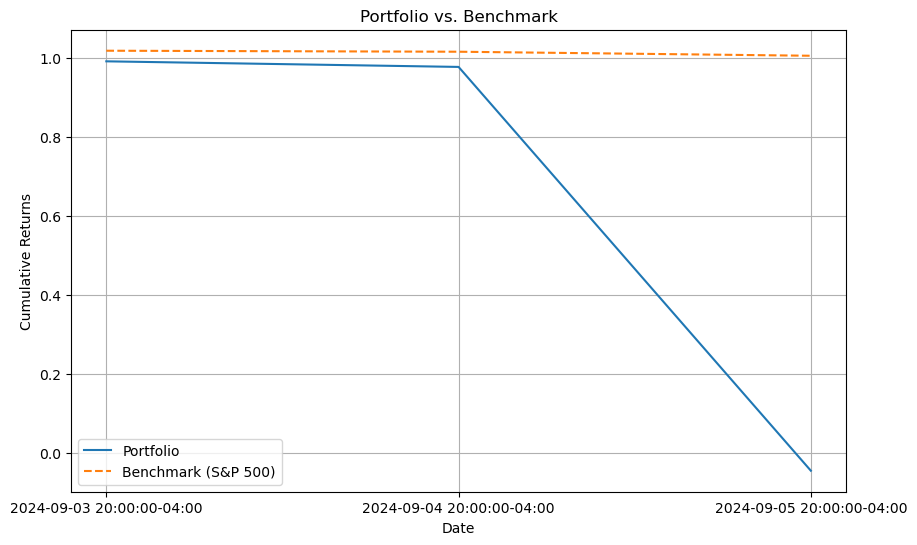

In [25]:
# Mock benchmark data (replace this with real benchmark data if available)
# For example, benchmark_daily_returns = sp500_data['close'].pct_change().dropna()
benchmark_daily_returns = np.random.normal(0.001, 0.01, len(daily_returns))

# Benchmark vs. Portfolio
portfolio_cumulative_return = (1 + daily_returns).cumprod()
benchmark_cumulative_return = (1 + benchmark_daily_returns).cumprod()

plt.figure(figsize=(10, 6))
plt.plot(portfolio_cumulative_return.index, portfolio_cumulative_return.values, label="Portfolio")
plt.plot(portfolio_cumulative_return.index, benchmark_cumulative_return, label="Benchmark (S&P 500)", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Portfolio vs. Benchmark")
plt.legend()
plt.grid()
plt.show()

In [26]:
# Access data from the environment
# Calculate portfolio cost directly from the environment data
filtered_test_data['portfolio_cost'] = filtered_test_data.groupby('date')['adj close'].sum()

# Count budget violations
budget_violations = (filtered_test_data['portfolio_cost'] > test_env.budget).sum()
print(f"Budget Violations: {budget_violations}")

Budget Violations: 0


/var/folders/h_/kssb81453xb2cjn36fxdy_z40000gn/T/ipykernel_69619/2851425470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_data['portfolio_cost'] = filtered_test_data.groupby('date')['adj close'].sum()


In [27]:
# Save the trained model
model_path = "/Users/sarabjotsingh/Downloads/ppo_stock_portfolio_model.zip"
model.save(model_path)
print(f"Model saved to {model_path}")

Model saved to /Users/sarabjotsingh/Downloads/ppo_stock_portfolio_model.zip


In [28]:
import pickle

# Function to save the environment
def save_environment(env, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(env, f)
    print(f"Environment saved successfully at: {file_path}")

# Example usage
file_path = "/Users/sarabjotsingh/Downloads/reinforcement_learning_env.pkl"
env = StockPortfolioEnv(data=filtered_test_data, budget=10000, risk_tolerance='medium')
save_environment(env, file_path)


Environment saved successfully at: /Users/sarabjotsingh/Downloads/reinforcement_learning_env.pkl
